# Lecture 11 (Neural Networks Continued)

## Short Review: The Perceptron

In its most basic form, a **perceptron** is a function that maps an input vector $\mathbf{x} = (x_1, \dots, x_d)^\top \in \mathbb{R}^d$ to an output $y \in \{0,1\}$. The perceptron computes a weighted sum of the inputs, applies a bias term, and then passes the result through a nonlinear activation, typically a threshold function. Formally, given a vector of weights $\mathbf{w} = (w_1, \dots, w_d)^\top \in \mathbb{R}^d$ and a bias $b \in \mathbb{R}$, the perceptron computes

$$
z = \mathbf{w}^\top \mathbf{x} + b
$$

and outputs

$$
\hat{y} = \varphi(z),
$$

where $\varphi : \mathbb{R} \to \{0,1\}$ is the Heaviside step function:

$$
\varphi(z) = 
\begin{cases}
1 & \text{if } z \geq 0, \\
0 & \text{otherwise}.
\end{cases}
$$

The training of the perceptron consists of adjusting $\mathbf{w}$ and $b$ based on labeled training examples $(\mathbf{x}^{(i)}, y^{(i)})$. The classic **Perceptron Learning Algorithm** updates the weights and bias iteratively. Upon observing a misclassified example, the update rule is given by

$$
\mathbf{w} \leftarrow \mathbf{w} + \eta (y^{(i)} - \hat{y}^{(i)}) \mathbf{x}^{(i)},
$$
$$
b \leftarrow b + \eta (y^{(i)} - \hat{y}^{(i)}),
$$

where $\eta > 0$ is a learning rate parameter.

The Perceptron Convergence Theorem provides a foundational guarantee: if the data is linearly separable, the perceptron algorithm will find a solution in a finite number of steps. Explicitly:

> **Theorem (Perceptron Convergence Theorem).**  
> Suppose there exists a vector $\mathbf{w}^*$ and bias $b^*$ such that for all training examples $(\mathbf{x}^{(i)}, y^{(i)})$, 
> $$ y^{(i)} (\mathbf{w}^{*\top} \mathbf{x}^{(i)} + b^*) > 0. $$
> Then the perceptron learning algorithm converges to a separating hyperplane after a finite number of updates.



## Multilayer Feedforward Neural Networks 

The perceptron, as previously discussed, is fundamentally limited to learning linearly separable functions. Indeed, it is trivial to verify that the set of decision boundaries realizable by a single perceptron consists only of hyperplanes in $\mathbb{R}^d$. To transcend these limitations and approximate more complex functions, we must consider **compositions** of perceptron-like units, arranged in **layers**. This leads to the notion of a **feedforward neural network**.  Formally, a **feedforward neural network** with $L$ layers is a sequence of mappings

$$
\mathbf{x} \mapsto \mathbf{h}^{(1)} \mapsto \mathbf{h}^{(2)} \mapsto \cdots \mapsto \mathbf{h}^{(L)} = \hat{\mathbf{y}},
$$

where for each layer $\ell = 1, \dots, L$, the transformation is given by

$$
\mathbf{h}^{(\ell)} = \sigma^{(\ell)}\left( \mathbf{W}^{(\ell)} \mathbf{h}^{(\ell-1)} + \mathbf{b}^{(\ell)} \right).
$$

Here, 
- $\mathbf{h}^{(0)} = \mathbf{x}$ is the input vector,
- $\mathbf{W}^{(\ell)} \in \mathbb{R}^{d_{\ell} \times d_{\ell-1}}$ is a weight matrix,
- $\mathbf{b}^{(\ell)} \in \mathbb{R}^{d_{\ell}}$ is a bias vector,
- $\sigma^{(\ell)}$ is a (typically nonlinear) activation function applied componentwise.

Thus, each layer applies an affine transformation followed by a nonlinear activation.

**Composition Structure.**  
The entire network computes a function of the form

$$
\hat{\mathbf{y}} = F(\mathbf{x}; \Theta) = \left( \sigma^{(L)} \circ A^{(L)} \circ \sigma^{(L-1)} \circ A^{(L-1)} \circ \cdots \circ \sigma^{(1)} \circ A^{(1)} \right)(\mathbf{x}),
$$
where $A^{(\ell)}(\mathbf{z}) = \mathbf{W}^{(\ell)} \mathbf{z} + \mathbf{b}^{(\ell)}$ and $\Theta = \{ (\mathbf{W}^{(\ell)}, \mathbf{b}^{(\ell)}) \}_{\ell=1}^L$ denotes the collection of all trainable parameters.

Thus, the neural network realizes a highly structured **composite function**, alternating between affine maps and nonlinearities.

---

## Universal Approximation Theorem

It is not immediate whether a multilayer network of the above form can represent complex functions beyond those achievable by linear decision boundaries. However, a foundational result, the **Universal Approximation Theorem**, affirms the expressive power of even shallow networks.

> **Theorem (Universal Approximation Theorem).**  
> Let $\sigma : \mathbb{R} \to \mathbb{R}$ be a nonconstant, bounded, continuous function. Then, for any continuous function $f : [0,1]^d \to \mathbb{R}$ and any $\epsilon > 0$, there exists a neural network with a single hidden layer, a finite number of neurons, and activation function $\sigma$, such that the network's output $F(\mathbf{x})$ satisfies
> $$ \sup_{\mathbf{x} \in [0,1]^d} |f(\mathbf{x}) - F(\mathbf{x})| < \epsilon. $$

The proof of this result, originally by Cybenko (1989) and extended by others, leverages classical results in functional analysis, particularly the **Stone-Weierstrass theorem**. The essential idea is that finite linear combinations of functions of the form $\sigma(\mathbf{w}^\top \mathbf{x} + b)$ are dense in the space of continuous functions on compact subsets of $\mathbb{R}^d$ under the supremum norm. Thus, in principle, a neural network with a **single hidden layer** and sufficiently many neurons can approximate any continuous function to arbitrary precision. Nonetheless, it must be emphasized that while the theorem guarantees the **existence** of such an approximation, it says nothing about the **efficiency** of the representation. In many cases, the number of neurons required may be prohibitively large. This observation motivates the use of **deep** architectures (i.e., with multiple hidden layers), which can achieve expressive approximations with fewer neurons per layer by **hierarchically composing features**.


## Forward Propagation: A Formal Derivation

Given a feedforward neural network as previously described, forward propagation is the process by which an input $\mathbf{x} \in \mathbb{R}^{d_0}$ is mapped to an output $\hat{\mathbf{y}} \in \mathbb{R}^{d_L}$ through a sequence of intermediate computations. We define recursively the sequence of **pre-activations** and **activations** at each layer. For $\ell = 1, \dots, L$, the **pre-activation** $\mathbf{z}^{(\ell)} \in \mathbb{R}^{d_\ell}$ is defined as
$$
\mathbf{z}^{(\ell)} = \mathbf{W}^{(\ell)} \mathbf{h}^{(\ell-1)} + \mathbf{b}^{(\ell)},
$$
the **activation** $\mathbf{h}^{(\ell)} \in \mathbb{R}^{d_\ell}$ is then
$$
\mathbf{h}^{(\ell)} = \sigma^{(\ell)}\left( \mathbf{z}^{(\ell)} \right),
$$
where $\sigma^{(\ell)} : \mathbb{R} \to \mathbb{R}$ is applied **componentwise** to each entry of $\mathbf{z}^{(\ell)}$.  Here, $\mathbf{h}^{(0)} = \mathbf{x}$ is the given input, and $\mathbf{h}^{(L)} = \hat{\mathbf{y}}$ is the final network output. Thus, forward propagation can be summarized layer-by-layer by the pair of equations:

$$
\begin{aligned}
\mathbf{z}^{(\ell)} &= \mathbf{W}^{(\ell)} \mathbf{h}^{(\ell-1)} + \mathbf{b}^{(\ell)}, \\
\mathbf{h}^{(\ell)} &= \sigma^{(\ell)}\left( \mathbf{z}^{(\ell)} \right),
\end{aligned}
$$

for each $\ell = 1, \dots, L$.

<center>
    <img src="../images/neural-net.png" width="400px">
</center>


---

## The Computation Graph Structure

It is crucial to observe that the operations of forward propagation define a **directed acyclic graph (DAG)** of computations. Each node in the graph corresponds to a variable (such as $\mathbf{z}^{(\ell)}$ or $\mathbf{h}^{(\ell)}$), and each edge corresponds to an operation, either a matrix multiplication, a vector addition, or a nonlinear activation.  This graphical structure is not merely an illustration; it encodes the functional dependencies that will be essential for **backpropagation**. Specifically, the graph structure enables an efficient application of the **chain rule** for derivatives during the training phase, which we will formalize shortly.

---

## Towards the Derivatives: Preparing for Backpropagation

Suppose now that we are given a **loss function** $\mathcal{L}(\hat{\mathbf{y}}, \mathbf{y})$, where $\hat{\mathbf{y}}$ is the network output and $\mathbf{y}$ is the true label or target value. The fundamental goal of training is to compute the gradient of the loss $\mathcal{L}$ with respect to all trainable parameters $\{ \mathbf{W}^{(\ell)}, \mathbf{b}^{(\ell)} \}_{\ell=1}^L$. Formally, we wish to compute

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(\ell)}}, \quad \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(\ell)}},
\quad \text{for each layer } \ell = 1, \dots, L.
$$

However, the dependence of $\mathcal{L}$ on the parameters is highly **composite**: each parameter affects the loss only **indirectly** via multiple layers of transformations. Thus, the computation of the derivatives must rely systematically on the **chain rule** of multivariable calculus. More precisely, at each layer, the derivatives must propagate **backward** from the output toward the input along the computation graph — hence the term **backpropagation**.

To prepare for this derivation, observe that for each layer $\ell$,
$$
\mathcal{L} = \mathcal{L}(\mathbf{h}^{(L)}) = \mathcal{L}(\sigma^{(L)}(\mathbf{z}^{(L)})),
$$
where $\mathbf{z}^{(L)}$ depends on $\mathbf{h}^{(L-1)}$,
$$
\mathbf{z}^{(L)} = \mathbf{W}^{(L)} \mathbf{h}^{(L-1)} + \mathbf{b}^{(L)},
$$
and $\mathbf{h}^{(L-1)}$ depends similarly on $\mathbf{h}^{(L-2)}$, and so forth recursively. Hence, the entire dependence of $\mathcal{L}$ on parameters $\mathbf{W}^{(\ell)}$, $\mathbf{b}^{(\ell)}$ is mediated through these chains of dependencies. This naturally leads us to define at each layer the **error signal**:

$$
\delta^{(\ell)} := \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(\ell)}},
$$
that is, the derivative of the loss with respect to the pre-activation $\mathbf{z}^{(\ell)}$.  The backpropagation algorithm will compute the $\delta^{(\ell)}$ recursively, starting from the output layer $\ell = L$ and moving backward to $\ell = 1$. Once the $\delta^{(\ell)}$ are known, the gradients with respect to the parameters follow directly:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(\ell)}} = \delta^{(\ell)} \mathbf{h}^{(\ell-1)\top},
$$
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(\ell)}} = \delta^{(\ell)}.
$$

Thus, the entire gradient computation reduces to:
1. Forward propagation: compute $\mathbf{z}^{(\ell)}$ and $\mathbf{h}^{(\ell)}$ for all $\ell$,
2. Backward propagation: compute $\delta^{(\ell)}$ for all $\ell$,
3. Parameter gradients: compute $\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(\ell)}}, \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(\ell)}}$.



## Derivation of the Backpropagation Recursion: The Computation of $\delta^{(\ell)}$

Recall that for each layer $\ell$, we have defined the **error signal** as

$$
\delta^{(\ell)} := \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(\ell)}},
$$

that is, the derivative of the final loss $\mathcal{L}$ with respect to the **pre-activation** $\mathbf{z}^{(\ell)}$ at that layer. Our goal is to derive a **recursive formula** expressing $\delta^{(\ell)}$ in terms of $\delta^{(\ell+1)}$, enabling the efficient computation of all $\delta^{(\ell)}$ by a backward sweep through the network. Let us proceed step-by-step, carefully applying the chain rule.

---

### Step 1: Starting at the Output Layer

Consider first the **last layer** $\ell = L$. At this layer, the network output is

$$
\hat{\mathbf{y}} = \mathbf{h}^{(L)} = \sigma^{(L)}\left( \mathbf{z}^{(L)} \right),
$$
where $\sigma^{(L)}$ is applied componentwise.

Thus, by the chain rule,

$$
\delta^{(L)} = \frac{\partial \mathcal{L}}{\partial \mathbf{h}^{(L)}} \odot \sigma^{(L)'}\left( \mathbf{z}^{(L)} \right),
$$
where $\odot$ denotes the **Hadamard (elementwise) product**, and $\sigma^{(L)'}\left( \mathbf{z}^{(L)} \right)$ is the vector of derivatives of $\sigma^{(L)}$ evaluated at $\mathbf{z}^{(L)}$. The loss $\mathcal{L}$ depends on $\mathbf{z}^{(L)}$ via $\mathbf{h}^{(L)} = \sigma^{(L)}(\mathbf{z}^{(L)})$. Thus, by the chain rule, the derivative with respect to $\mathbf{z}^{(L)}$ factors as the derivative of $\mathcal{L}$ with respect to $\mathbf{h}^{(L)}$ times the Jacobian of $\sigma^{(L)}$. Since $\sigma^{(L)}$ is applied coordinatewise, its Jacobian is diagonal, and the derivative simplifies to the Hadamard product. Thus, the error at the output layer is

$$
\delta^{(L)} = \nabla_{\mathbf{h}^{(L)}} \mathcal{L} \odot \sigma^{(L)'}\left( \mathbf{z}^{(L)} \right),
$$
where $\nabla_{\mathbf{h}^{(L)}} \mathcal{L}$ denotes the gradient of the loss with respect to the output activations.

---

### Step 2: Backpropagation to Hidden Layers

Now consider a hidden layer $\ell < L$.  At layer $\ell$, recall that the activation is given by
$$
\mathbf{h}^{(\ell)} = \sigma^{(\ell)}\left( \mathbf{z}^{(\ell)} \right),
$$
Then the pre-activation at the next layer is
$$
\mathbf{z}^{(\ell+1)} = \mathbf{W}^{(\ell+1)} \mathbf{h}^{(\ell)} + \mathbf{b}^{(\ell+1)}.
$$
Thus, $\mathcal{L}$ depends on $\mathbf{z}^{(\ell)}$ via two intermediate dependencies:
$$
\mathbf{z}^{(\ell)} \mapsto \mathbf{h}^{(\ell)} = \sigma^{(\ell)}(\mathbf{z}^{(\ell)}) \mapsto \mathbf{z}^{(\ell+1)} = \mathbf{W}^{(\ell+1)} \mathbf{h}^{(\ell)} + \mathbf{b}^{(\ell+1)} \mapsto \mathcal{L}.
$$

Therefore, by the chain rule, the total derivative of $\mathcal{L}$ with respect to $\mathbf{z}^{(\ell)}$ is

$$
\delta^{(\ell)} = \frac{\partial \mathcal{L}}{\partial \mathbf{h}^{(\ell)}} \odot \sigma^{(\ell)'}\left( \mathbf{z}^{(\ell)} \right).
$$

Now, what is $\frac{\partial \mathcal{L}}{\partial \mathbf{h}^{(\ell)}}$?  Since

$$
\mathbf{z}^{(\ell+1)} = \mathbf{W}^{(\ell+1)} \mathbf{h}^{(\ell)} + \mathbf{b}^{(\ell+1)},
$$
and $\mathcal{L}$ depends on $\mathbf{h}^{(\ell)}$ only through $\mathbf{z}^{(\ell+1)}$, we have

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{h}^{(\ell)}} = \left( \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(\ell+1)}} \right) \mathbf{W}^{(\ell+1)}.
$$

Notice the dimensions:  
- $\delta^{(\ell+1)} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{(\ell+1)}} \in \mathbb{R}^{d_{\ell+1}}$,
- $\mathbf{W}^{(\ell+1)} \in \mathbb{R}^{d_{\ell+1} \times d_{\ell}}$,
thus
- $\delta^{(\ell+1)} \mathbf{W}^{(\ell+1)} \in \mathbb{R}^{d_{\ell}}$ (after appropriate conventions regarding transposition, which we shall respect).

Therefore, we obtain the following recursive formula for the error

$$
\delta^{(\ell)} = \left( \mathbf{W}^{(\ell+1)\top} \delta^{(\ell+1)} \right) \odot \sigma^{(\ell)'}\left( \mathbf{z}^{(\ell)} \right),
$$

where $\mathbf{W}^{(\ell+1)\top}$ is the transpose of $\mathbf{W}^{(\ell+1)}$.

---

## Summary of the Recursive Backpropagation Formula

The backpropagation equations can now be written precisely:

1. At the output layer $\ell = L$:
$$
\delta^{(L)} = \nabla_{\mathbf{h}^{(L)}} \mathcal{L} \odot \sigma^{(L)'}\left( \mathbf{z}^{(L)} \right),
$$

2. For each hidden layer $\ell = L-1, \dots, 1$:
$$
\delta^{(\ell)} = \left( \mathbf{W}^{(\ell+1)\top} \delta^{(\ell+1)} \right) \odot \sigma^{(\ell)'}\left( \mathbf{z}^{(\ell)} \right).
$$

Finally, once all $\delta^{(\ell)}$ are computed, the gradients of the parameters follow immediately:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{(\ell)}} = \delta^{(\ell)} \mathbf{h}^{(\ell-1)\top},
$$
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{(\ell)}} = \delta^{(\ell)}.
$$


This completes the derivation of the backpropagation algorithm in its formal, layer-by-layer recursive structure.


## An Explicit Example in TensorFlow/Keras

Let us do an example in tensorflow and keras.

In [8]:
import numpy as np

import tensorflow as tf

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

Let us start with generating a sythetic dataset for our experiments: Let us create data points from a simple nonlinear function, e.g., a sine curve with noise.

In [26]:
N = 200
X = np.linspace(-2, 2, N).reshape(-1, 1)
Y = np.sin(3 * X) + 0.1 * np.random.randn(N, 1)

Now, we define a neural network with a single hidden layer with 10 neurons.

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),  # Hidden layer with 10 neurons
    tf.keras.layers.Dense(1)  # Output layer with linear activation (default)
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='mse'  # Mean Squared Error loss
)

history = model.fit(
    X, Y,
    epochs=500,
    batch_size=32,
    verbose=0  # Suppress verbose output
)

/home/kaygun/.local/lib/python3.13/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let us see how training went:

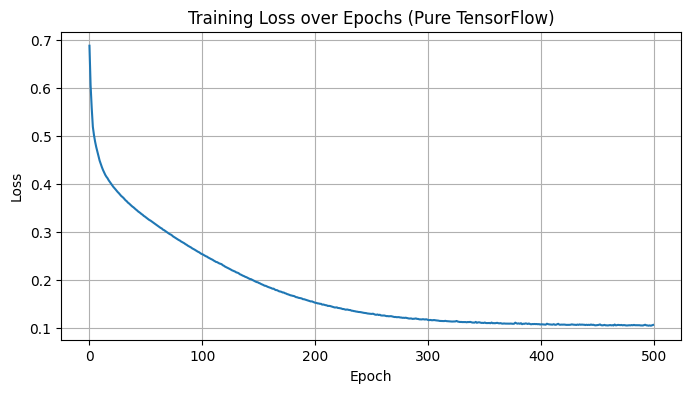

In [28]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs (Pure TensorFlow)")
plt.grid(True)
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


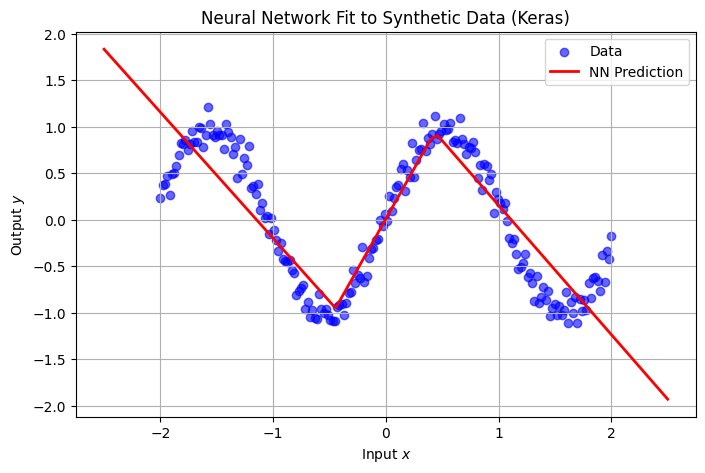

In [29]:
X_plot = np.linspace(-2.5, 2.5, 400).reshape(-1, 1)
Y_pred_plot = model.predict(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(X, Y, label="Data", color='blue', alpha=0.6)
plt.plot(X_plot, Y_pred_plot, label="NN Prediction", color='red', linewidth=2)
plt.xlabel("Input $x$")
plt.ylabel("Output $y$")
plt.title("Neural Network Fit to Synthetic Data (Keras)")
plt.legend()
plt.grid(True)
plt.show()

- The model is constructed as a **Sequential** composition of layers.
- The first hidden layer is a fully connected (`Dense`) layer with 10 neurons and a ReLU activation.
- The output layer is a single linear neuron (regression).
- The `compile` method internally sets up the optimizer (Stochastic Gradient Descent) and the loss function (Mean Squared Error).
- The `fit` method automatically manages:
    - forward propagation,
    - computation of the loss,
    - reverse-mode automatic differentiation (via TensorFlow's computational graph and `GradientTape` system internally),
    - parameter updates according to the computed gradients.
- The predictions are evaluated at a finer grid to visualize the network's learned approximation of the underlying function.


## The Same Example Repeated in PyTorch

**PyTorch** has become extremely popular, particularly in research and production settings, because of its **dynamic computation graph**, more **Pythonic syntax**, and excellent **debuggability**. Let us now faithfully **repeat** the procedure — build a simple neural network with a **single hidden layer** — but this time using **PyTorch** in a style corresponding to the TensorFlow/Keras code we previously wrote.

We shall:

- Build the model using the high-level `torch.nn.Module` API,
- Use PyTorch's built-in **automatic differentiation** (`torch.autograd`) for gradient computation,
- Use a standard optimizer (`torch.optim.SGD`),
- Train on the same synthetic data,
- Plot loss and predictions at the end.

We start by converting data to PyTorch tensors:

In [31]:
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

Next, we define our network:

In [32]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer: 1 input -> 10 hidden units
        self.output = nn.Linear(10, 1)  # Output layer: 10 hidden units -> 1 output

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Activation after hidden layer
        x = self.output(x)               # Linear output
        return x

model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Next, we do the training:

In [33]:
epochs = 5000
loss_history = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_tensor) # Forward pass
    loss = criterion(y_pred, Y_tensor) # Compute loss
    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Backpropagate the loss (automatic differentiation)
    optimizer.step()       # Update parameters
    # Save loss
    loss_history.append(loss.item())
    # Print occasionally
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

Epoch 0: Loss = 0.9122
Epoch 50: Loss = 0.4276
Epoch 100: Loss = 0.4137
Epoch 150: Loss = 0.4008
Epoch 200: Loss = 0.3872
Epoch 250: Loss = 0.3731
Epoch 300: Loss = 0.3588
Epoch 350: Loss = 0.3445
Epoch 400: Loss = 0.3304
Epoch 450: Loss = 0.3168
Epoch 500: Loss = 0.3037
Epoch 550: Loss = 0.2910
Epoch 600: Loss = 0.2790
Epoch 650: Loss = 0.2674
Epoch 700: Loss = 0.2564
Epoch 750: Loss = 0.2458
Epoch 800: Loss = 0.2357
Epoch 850: Loss = 0.2260
Epoch 900: Loss = 0.2169
Epoch 950: Loss = 0.2082
Epoch 1000: Loss = 0.2000
Epoch 1050: Loss = 0.1922
Epoch 1100: Loss = 0.1850
Epoch 1150: Loss = 0.1782
Epoch 1200: Loss = 0.1719
Epoch 1250: Loss = 0.1660
Epoch 1300: Loss = 0.1606
Epoch 1350: Loss = 0.1556
Epoch 1400: Loss = 0.1509
Epoch 1450: Loss = 0.1467
Epoch 1500: Loss = 0.1428
Epoch 1550: Loss = 0.1392
Epoch 1600: Loss = 0.1360
Epoch 1650: Loss = 0.1330
Epoch 1700: Loss = 0.1304
Epoch 1750: Loss = 0.1279
Epoch 1800: Loss = 0.1257
Epoch 1850: Loss = 0.1237
Epoch 1900: Loss = 0.1219
Epoch 195

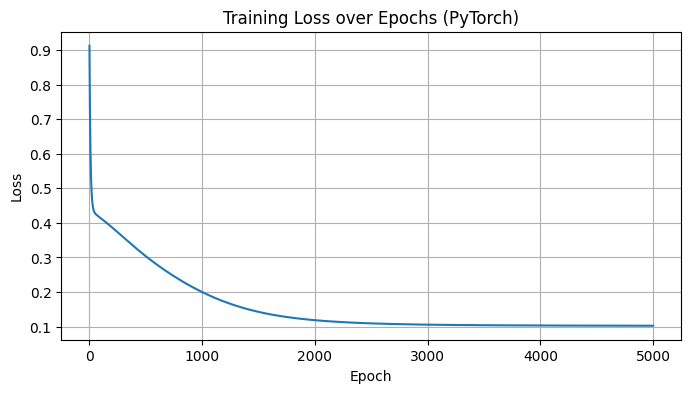

In [34]:
plt.figure(figsize=(8,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs (PyTorch)")
plt.grid(True)
plt.show()

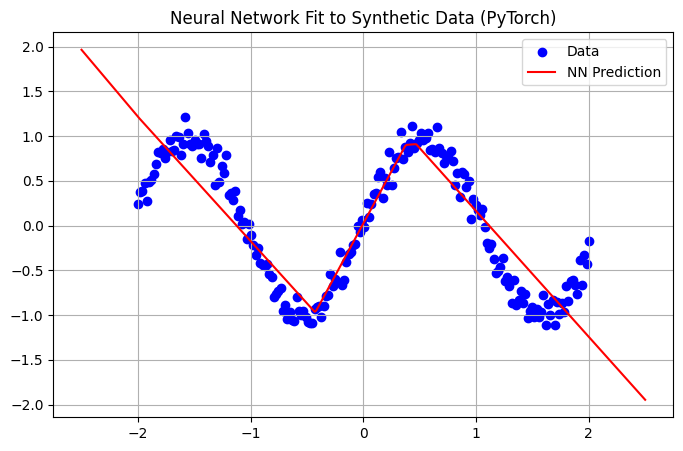

In [35]:
model.eval()
X_plot = np.linspace(-2.5, 2.5, 400).reshape(-1, 1)
X_plot_tensor = torch.tensor(X_plot, dtype=torch.float32)
Y_pred_plot = model(X_plot_tensor).detach().numpy()

plt.figure(figsize=(8,5))
plt.scatter(X, Y, label="Data", color='blue')
plt.plot(X_plot, Y_pred_plot, label="NN Prediction", color='red')
plt.legend()
plt.title("Neural Network Fit to Synthetic Data (PyTorch)")
plt.grid(True)
plt.show()

This code captures the structure of the network and training process very cleanly:

- The model is defined as a subclass of `nn.Module`, encapsulating the layers and the `forward` method.
- Loss is computed via `nn.MSELoss()`, analogous to TensorFlow's `'mse'` loss.
- The optimizer (`torch.optim.SGD`) applies gradient descent to parameters, which are collected automatically via `model.parameters()`.
- Gradients are computed via PyTorch's **dynamic reverse-mode automatic differentiation**, initiated by `loss.backward()`.
- Parameter updates are applied by `optimizer.step()` after zeroing previous gradients via `optimizer.zero_grad()`.
- Importantly, **PyTorch traces the computation dynamically** at runtime, unlike TensorFlow 1.x which used a static graph model. TensorFlow 2.x switched to dynamic execution (`eager execution`) by default, making it more PyTorch-like.



# Advanced Topics
## Backpropagation as Reverse-Mode Automatic Differentiation

At its core, **automatic differentiation** is a collection of algorithmic techniques for computing derivatives of functions expressed as compositions of elementary operations. In the context of neural networks, the function being differentiated is the composition of affine maps and nonlinear activations across layers, culminating in a scalar-valued loss. Backpropagation, traditionally introduced as a specific algorithm for training neural networks, is in fact an instance of the far more general theory of **reverse-mode automatic differentiation**. This theory applies to any scalar-valued composite function built from differentiable operations, and backpropagation inherits its structure directly from the general chain rule applied backward through the computation graph. Thus, **the abstraction level underlying backpropagation is not "neural networks" per se but "computational graphs"**, with neural networks being a particularly structured example.


Let us now formalize this connection carefully.

---

## Step 1: The Chain Rule and Composite Functions

Suppose we have a function $F: \mathbb{R}^n \to \mathbb{R}$ defined as a composition:

$$
F(\mathbf{x}) = (f_L \circ f_{L-1} \circ \cdots \circ f_1)(\mathbf{x}),
$$
where each $f_\ell$ maps between Euclidean spaces:

$$
f_\ell : \mathbb{R}^{d_{\ell-1}} \to \mathbb{R}^{d_\ell},
\quad d_0 = n, \quad d_L = 1.
$$

Thus, the structure mirrors that of a feedforward neural network: a sequence of transformations ending in a scalar output. The chain rule for multivariable functions asserts that the total derivative (Jacobian) of $F$ is given by:

$$
\mathrm{D}F(\mathbf{x}) = \mathrm{D}f_L(f_{L-1}(\cdots f_1(\mathbf{x}))) \cdot \mathrm{D}f_{L-1}(f_{L-2}(\cdots f_1(\mathbf{x}))) \cdots \mathrm{D}f_1(\mathbf{x}),
$$
where $\mathrm{D}f_\ell$ denotes the Jacobian matrix of $f_\ell$.  Since the final output is scalar, $\mathrm{D}F(\mathbf{x})$ is a row vector (the gradient). In principle, one could compute each Jacobian and multiply them forward. However, this would be computationally inefficient, especially when $n$ is large and the intermediate dimensions $d_\ell$ are also large. Instead, **reverse-mode automatic differentiation** efficiently computes the gradient by propagating derivatives backward through the computation graph.

---

## Step 2: The Principle of Reverse-Mode AD

The key idea of **reverse-mode** differentiation is the following:

- Rather than computing forward the entire Jacobian product (which would require storing large matrices),
- One computes and propagates **adjoints**: derivatives of the final output with respect to intermediate variables.

Formally, define for each intermediate variable $\mathbf{v}^{(\ell)} = f_\ell(\mathbf{v}^{(\ell-1)})$ the **adjoint**:

$$
\bar{\mathbf{v}}^{(\ell)} := \frac{\partial F}{\partial \mathbf{v}^{(\ell)}},
\quad \bar{\mathbf{v}}^{(L)} = 1,
$$
since $\mathbf{v}^{(L)} = F(\mathbf{x})$ is the scalar output itself. The reverse-mode recursion is then:

$$
\bar{\mathbf{v}}^{(\ell-1)} = \bar{\mathbf{v}}^{(\ell)} \cdot \mathrm{D}f_\ell(\mathbf{v}^{(\ell-1)}),
$$
for $\ell = L, L-1, \dots, 1$. Thus, the gradient $\nabla F(\mathbf{x}) = \bar{\mathbf{v}}^{(0)}$ is obtained after traversing the computation graph **backward** from the output to the input. In words, **reverse-mode AD propagates covectors ("row gradients") backward through the network**, applying local Jacobians at each step.

---

## Step 3: Interpretation of Backpropagation as Reverse-Mode AD

Let us now relate this formalism directly to the structure of backpropagation. In a feedforward neural network each layer computes a mapping:

$$
f_\ell: \mathbf{h}^{(\ell-1)} \mapsto \mathbf{h}^{(\ell)} = \sigma^{(\ell)}(\mathbf{W}^{(\ell)} \mathbf{h}^{(\ell-1)} + \mathbf{b}^{(\ell)}).
$$

The overall output then becomes

$$
\hat{y} = F(\mathbf{x}) = f_L \circ \cdots \circ f_1(\mathbf{x}),
$$
and the loss function is $\mathcal{L} = \mathcal{L}(\hat{y}, y)$. Thus, $\mathcal{L}$ depends on $\mathbf{x}$ via a layered composition of maps, precisely as in general reverse-mode AD. At each layer $\ell$, the backpropagation algorithm computes:

- The error term $\delta^{(\ell)}$, which corresponds exactly to the adjoint $\bar{\mathbf{z}}^{(\ell)} = \partial \mathcal{L} / \partial \mathbf{z}^{(\ell)}$.
- The error term $\delta^{(\ell)}$ propagates backward according to:

$$
\delta^{(\ell)} = \left( \mathbf{W}^{(\ell+1)\top} \delta^{(\ell+1)} \right) \odot \sigma^{(\ell)'}\left( \mathbf{z}^{(\ell)} \right),
$$
which matches the general recursion:

$$
\bar{\mathbf{v}}^{(\ell-1)} = \bar{\mathbf{v}}^{(\ell)} \cdot \mathrm{D}f_\ell(\mathbf{v}^{(\ell-1)}),
$$
when specialized to the layer transformations. Therefore, **backpropagation is simply reverse-mode automatic differentiation specialized to the composite function defined by a neural network**. This identification is not merely philosophical. It has profound practical consequences. Since any computational graph (not just standard layered networks) can be differentiated by reverse-mode AD, frameworks such as TensorFlow, PyTorch, and JAX implement general-purpose reverse-mode AD engines, capable of differentiating arbitrary programs composed of differentiable primitives. Thus, in modern computational practice, backpropagation is understood as an instance of a **general differentiation algorithm over computational graphs**, where the graph happens to be a layered feedforward network.
